<img src="https://images.unsplash.com/photo-1501504905252-473c47e087f8?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1074&q=80" alt="drawing" width="800" height="300" style="object-fit: cover;"/>

# Análise do Nível de Adaptatividade de estudantes no ensino Online

O objetivo dessa análise foi tentar encontrar e relacionar o nível de Adaptividade dos estudantes no ensino online com fatores relacionados, além de tentar encontrar modos de melhorar e de fazer esse modelo de ensino mais simples para mais estudantes.

Bibliografia:
- [Students' Adaptability Level Prediction in Online Education using Machine Learning Approaches](https://www.researchgate.net/publication/355891881_Students'_Adaptability_Level_Prediction_in_Online_Education_using_Machine_Learning_Approaches)
- [Students Adaptability Level in Online Education](https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education?resource=download)

Alunos:
- Deivid Gabriel da Silva Lopes Procópio

## Importanto as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Importando e realizando uma análise inicial dos dados

In [2]:
df_students = pd.read_csv('students_adaptability_level_online_education.csv')
df_students.head(5)


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [10]:
df_students.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


No geral o Dataset é dividido em três níveis de educação e três níveis de adaptividade, para termos um panorama geral vamos visualizar esses dois dados em gráficos e também, para uma melhor ideia, vamos visualizar sobre os tipos de instituições presentes no Dataframe

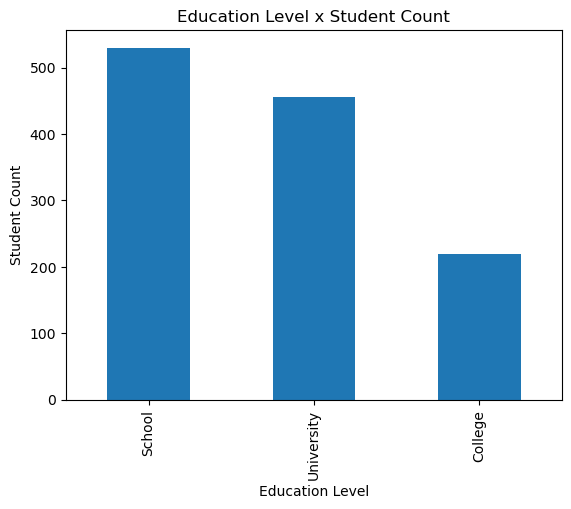

In [3]:
_ = df_students['Education Level'].value_counts().plot(
    kind='bar', xlabel='Education Level', ylabel='Student Count', title='Education Level x Student Count')


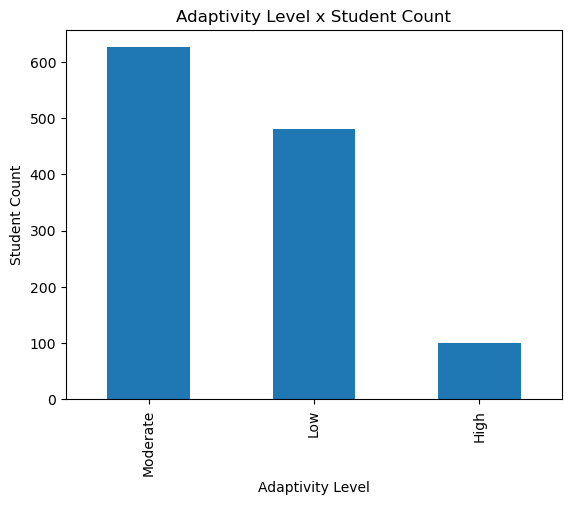

In [4]:
_ = df_students['Adaptivity Level'].value_counts().plot(
    kind='bar', xlabel='Adaptivity Level', ylabel='Student Count', title='Adaptivity Level x Student Count')


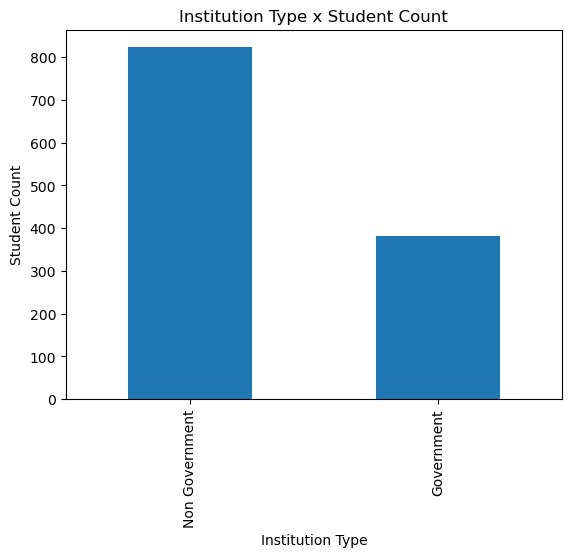

In [5]:
_ = df_students['Institution Type'].value_counts().plot(
    kind='bar', xlabel='Institution Type', ylabel='Student Count', title='Institution Type x Student Count')


## Iniciando a Análise dos Níveis de Adaptação

As principais relações que foram possíveis de serem visualizadas foram os níveis de Adaptatividade e o tipo de internet, o tipo de instituição e a duração da aula.

Motivos dessas correlações serem utilizadas:
- Tipo de Internet
    - Com uma internet de melhor tipo é possível acessar o material de forma mais fácil e prática, o que facilitaria na Adaptação.
- Tipo de Instituição
    - Temos que as instituições não governamentais vão, geralmente, ter uma melhor estrutura e, talvez, uma melhor posição financeira para entregar para os estudantes os materiais necessários para os estudos remotos, facilitando assim a Adaptação.
- Duração de aula
    - As instituições que utilizarem um menor tempo de aula podem sofrer com os alunos estudando menos e, por isso, não se adaptando, e nem sequer fazendo eles estudar, mas aquelas que tem um maior tempo de aula podem cansar o aluno e fazer com que o desempenho deles caiam, assim dificuldando na adaptação.

## Baixa adaptação

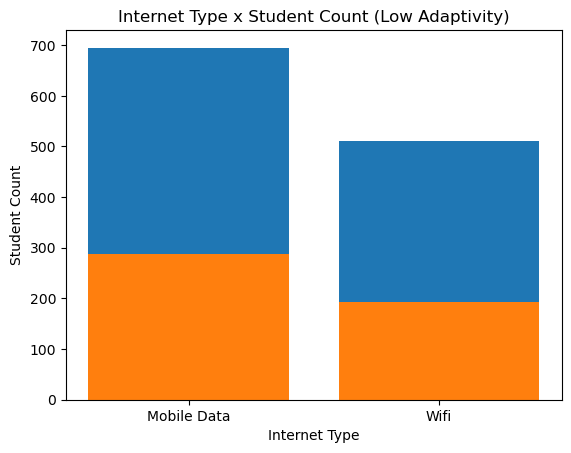

In [9]:
df_internet_type_low_counted = df_students[df_students['Adaptivity Level']
                                           == 'Low']['Internet Type'].value_counts()
df_internet_type_counted = df_students['Internet Type'].value_counts()

plt.bar(df_internet_type_counted.index, df_internet_type_counted.values)
plt.bar(df_internet_type_low_counted.index,
        df_internet_type_low_counted.values)
plt.title('Internet Type x Student Count (Low Adaptivity)')
plt.xlabel('Internet Type')
plt.ylabel('Student Count')
plt.show()


Pode ser observado que uma maior parte dos que tiveram um nível de Adaptabilidade mais baixo foram os que estavam utilizando os dados móveis, mas não parece ser algo muito definitivo visto a pequena diferença, daqui podemos começar a ter a ideia de que o tipo de conexão atualmente não está afetando muito.

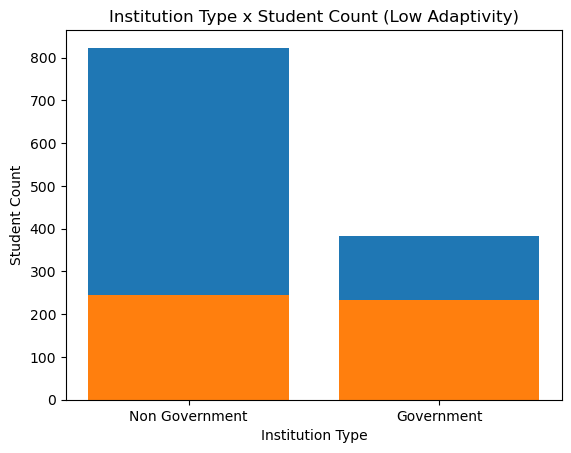

In [11]:
df_institution_type_low_counted = df_students[df_students['Adaptivity Level']
                                              == 'Low']['Institution Type'].value_counts()
df_institution_type_counted = df_students['Institution Type'].value_counts()

plt.bar(df_institution_type_counted.index, df_institution_type_counted.values)
plt.bar(df_institution_type_low_counted.index,
        df_institution_type_low_counted.values)
plt.title('Institution Type x Student Count (Low Adaptivity)')
plt.xlabel('Institution Type')
plt.ylabel('Student Count')
plt.show()


Mesmo estando com uma divisão entre cada tipo bem feita, temos que notar que a maior parte dos estudantes de escolas governamentais parecem ter uma baixa adaptabilidade.

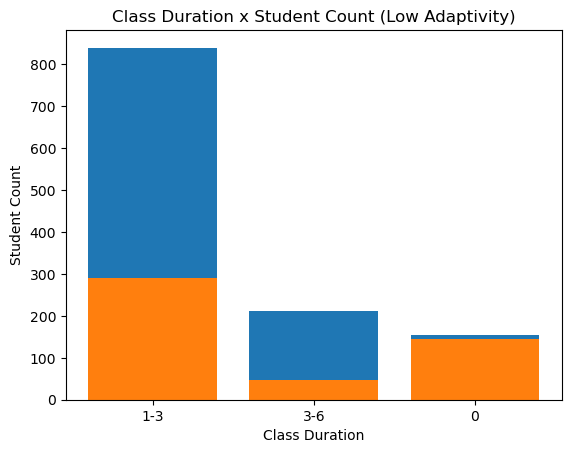

In [12]:
df_class_duration_low_counted = df_students[df_students['Adaptivity Level']
                                            == 'Low']['Class Duration'].value_counts()
df_class_duration_counted = df_students['Class Duration'].value_counts()

plt.bar(df_class_duration_counted.index, df_class_duration_counted.values)
plt.bar(df_class_duration_low_counted.index,
        df_class_duration_low_counted.values)
plt.title('Class Duration x Student Count (Low Adaptivity)')
plt.xlabel('Class Duration')
plt.ylabel('Student Count')
plt.show()


Como era esperado, estudantes sem aulas no período online tem uma grande chance de não se adaptar.

## Adaptação Moderada

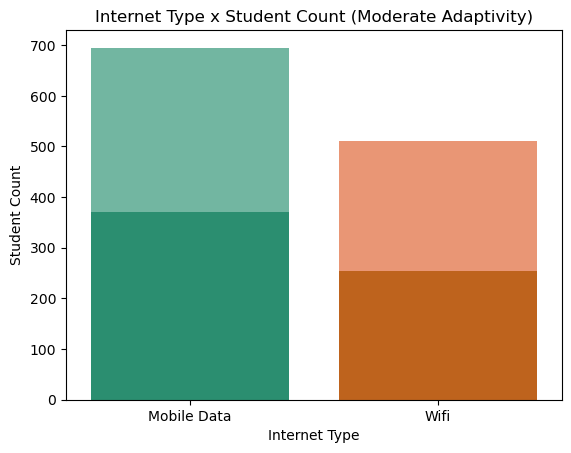

In [16]:
df_internet_type_moderate_counted = df_students[df_students['Adaptivity Level']
                                                == 'Moderate']['Internet Type'].value_counts()
df_internet_type_counted = df_students['Internet Type'].value_counts()

sns.barplot(x=df_internet_type_counted.index,
            y=df_internet_type_counted.values, palette='Set2')
sns.barplot(x=df_internet_type_moderate_counted.index,
            y=df_internet_type_moderate_counted.values, palette='Dark2')

plt.title('Internet Type x Student Count (Moderate Adaptivity)')
plt.xlabel('Internet Type')
plt.ylabel('Student Count')

plt.show()


Com essa análise temos uma confirmação da suspeita anterior, o tipo de conexão não é um grande fator na adaptabilidade dos estudantes.

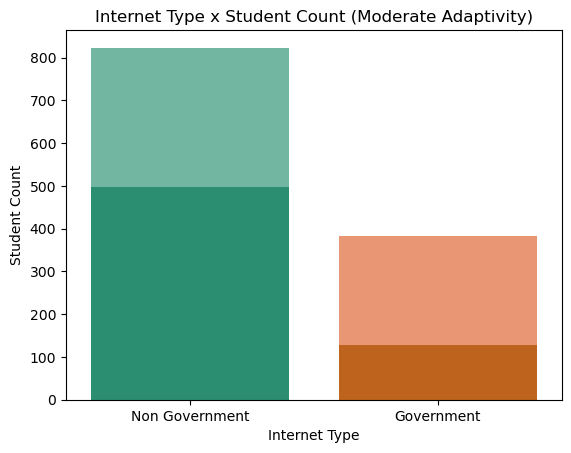

In [17]:
df_institution_type_moderate_counted = df_students[df_students['Adaptivity Level']
                                                   == 'Moderate']['Institution Type'].value_counts()
df_institution_type_counted = df_students['Institution Type'].value_counts()

sns.barplot(x=df_institution_type_counted.index,
            y=df_institution_type_counted.values, palette='Set2')
sns.barplot(x=df_institution_type_moderate_counted.index,
            y=df_institution_type_moderate_counted.values, palette='Dark2')

plt.title('Internet Type x Student Count (Moderate Adaptivity)')
plt.xlabel('Internet Type')
plt.ylabel('Student Count')

plt.show()


A maior parte dos estudantes com adaptividade moderada foram de instituições não governamentais, confirmando também as suspeitas anteriores.

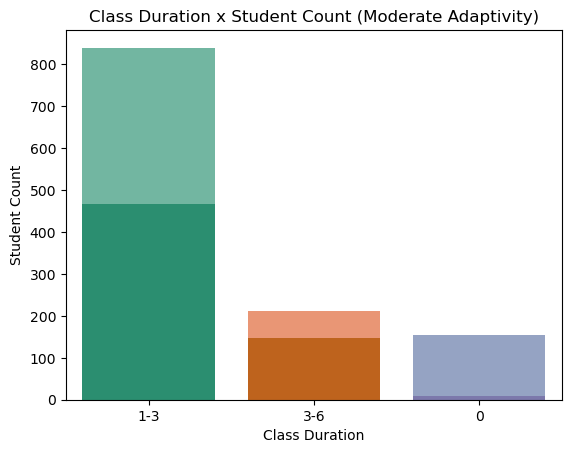

In [19]:
df_class_duration_moderate_counted = df_students[df_students['Adaptivity Level']
                                                 == 'Moderate']['Class Duration'].value_counts()
df_class_duration_counted = df_students['Class Duration'].value_counts()

sns.barplot(x=df_class_duration_counted.index,
            y=df_class_duration_counted.values, palette='Set2')
sns.barplot(x=df_class_duration_moderate_counted.index,
            y=df_class_duration_moderate_counted.values, palette='Dark2')

plt.title('Class Duration x Student Count (Moderate Adaptivity)')
plt.xlabel('Class Duration')
plt.ylabel('Student Count')

plt.show()


Aqui vemos que um tempo "ideal" de aula seria de 1 a 6 horas de aula.

# Alta Adaptatividade

In [21]:
df_internet_type_high_counted = df_students[df_students['Adaptivity Level']
                                            == 'High']['Internet Type'].value_counts()
df_internet_type_counted = df_students['Internet Type'].value_counts()

counts = pd.concat([df_internet_type_high_counted, df_internet_type_counted])

df_internet = pd.DataFrame({"Type": ["High", "High", "All", "All"], "Internet Type": [
                           'Wifi', 'Mobile', 'Wifi', 'Mobile'], "Count": counts})

fig = px.bar(df_internet, x='Internet Type', y='Count', color='Type',
             title='Internet Type x Student Count (High Adaptivity)',
             labels=['Internet Type', 'Student Count'])

fig.show()


In [22]:
df_institution_type_high_counted = df_students[df_students['Adaptivity Level']
                                               == 'High']['Institution Type'].value_counts()
df_institution_type_counted = df_students['Institution Type'].value_counts()

counts = pd.concat([df_institution_type_high_counted,
                   df_institution_type_counted])

df_institution_type = pd.DataFrame({"Type": ["High", "High", "All", "All"], "Institution Type": [
                                   'Non Government', 'Government', 'Non Government', 'Government'], "Count": counts})

fig = px.bar(df_institution_type, x='Institution Type',
             y='Count', color='Type', title='Institution Type x Student Count (High Adaptivity)',
             labels=['Institution Type', 'Student Count'])

fig.show()


In [23]:
df_class_duration_high_counted = df_students[df_students['Adaptivity Level']
                                             == 'High']['Class Duration'].value_counts()
df_class_duration_counted = df_students['Class Duration'].value_counts()

counts = pd.concat([df_class_duration_high_counted,
                   pd.Series([0]), df_class_duration_counted])

df_class_duration = pd.DataFrame({"Type": ["High", "High", "High", "All", "All", "All"], "Class Duration": [
                                 '1-3', '3-6', '0', '1-3', '3-6', '0'], "Count": counts})

fig = px.bar(df_class_duration, x='Class Duration', y='Count', color='Type', title='Class Duration x Student Count (High Adaptivity)',
             labels=['Class Duration', 'Student Count'])

fig.show()
